In [ ]:
# Andrea Mercado Jiménez
# Proyecto Final

In [18]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
base_dir = r'C:\Users\andim\OneDrive\Escritorio\Neurociencias-2025-2\S06_proyecto\dataset'
train_dir = os.path.join(base_dir, 'training')
test_dir = os.path.join(base_dir, 'testing')

In [20]:
# Contar imágenes por clase en entrenamiento
for category in os.listdir(train_dir):
    category_path = os.path.join(train_dir, category)
    print(f"{category}: {len(os.listdir(category_path))} imágenes")

glioma: 1321 imágenes
meningioma: 1339 imágenes
notumor: 1595 imágenes
pituitary: 1457 imágenes


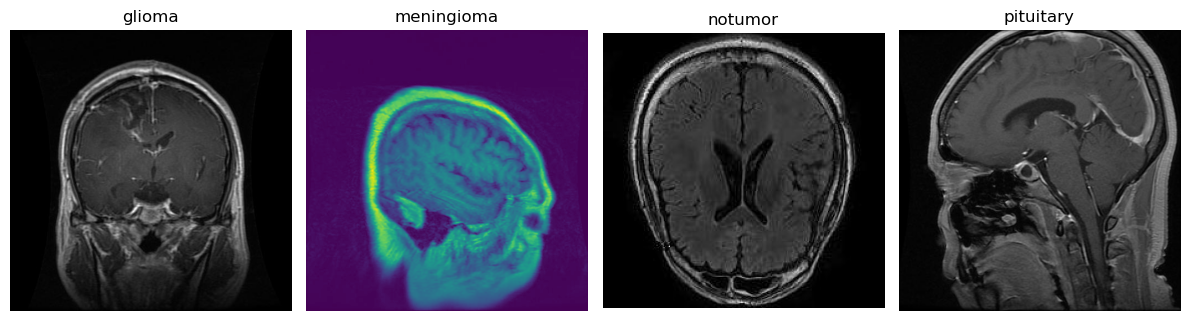

In [21]:
# Visualizar imágenes
fig, axs = plt.subplots(1, 4, figsize=(12, 4))
for i, category in enumerate(['glioma', 'meningioma', 'notumor', 'pituitary']):
    path = os.path.join(train_dir, category)
    img_path = os.path.join(path, random.choice(os.listdir(path)))
    img = Image.open(img_path)
    axs[i].imshow(img)
    axs[i].set_title(category)
    axs[i].axis('off')
plt.tight_layout()
plt.show()

In [12]:
# Preprocesamiento y aumento de datos
img_size = (150, 150)
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [13]:
# Crear modelo CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,868 (18.42 MB)

 Trainable params: 4,828,868 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Entrenar modelo
history = model.fit(
    train_gen,
    epochs=10,
    validation_data=test_gen
)

Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 532s 3s/step - accuracy: 0.5169 - loss: 1.0836 - val_accuracy: 0.7391 - val_loss: 0.7452
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 223s 1s/step - accuracy: 0.7595 - loss: 0.6119 - val_accuracy: 0.6590 - val_loss: 0.8876
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.8097 - loss: 0.4876 - val_accuracy: 0.8124 - val_loss: 0.4409
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 206s 1s/step - accuracy: 0.8403 - loss: 0.4249 - val_accuracy: 0.7963 - val_loss: 0.5485
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.8670 - loss: 0.3696 - val_accuracy: 0.8383 - val_loss: 0.3641
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 195s 1s/step - accuracy: 0.8935 - loss: 0.2958 - val_accuracy: 0.7811 - val_loss: 0.5621
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 185s 1s/step - accuracy: 0.8891 - loss: 0.2807 - val_accuracy: 0.8421 - val_loss: 0.4007
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 180s 1s/step - accuracy: 0.8990 - loss: 0.2680 - val_accu

In [22]:
# Evaluar desempeño
loss, accuracy = model.evaluate(test_gen)
print(f"Accuracy en test: {accuracy:.4f}")

# Matriz de confusión y métricas
y_pred = model.predict(test_gen)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_gen.classes
labels = list(test_gen.class_indices.keys())

print("\nReporte de clasificación:\n")
print(classification_report(y_true, y_pred_classes, target_names=test_gen.class_indices.keys()))

41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 272ms/step - accuracy: 0.9008 - loss: 0.2438
Accuracy en test: 0.9283
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 261ms/step

Reporte de clasificación:

              precision    recall  f1-score   support

      glioma       0.95      0.89      0.92       300
  meningioma       0.87      0.83      0.85       306
     notumor       0.93      0.99      0.96       405
   pituitary       0.97      0.98      0.98       300

    accuracy                           0.93      1311
   macro avg       0.93      0.92      0.93      1311
weighted avg       0.93      0.93      0.93      1311



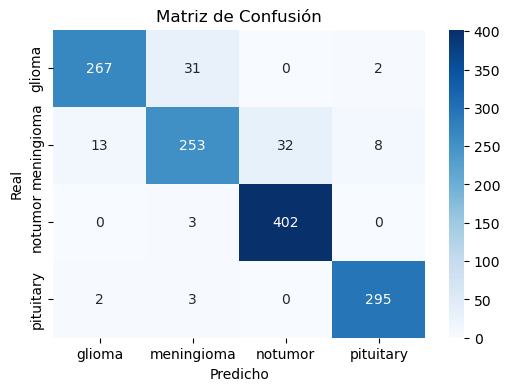

In [24]:
# Matriz de confusión
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


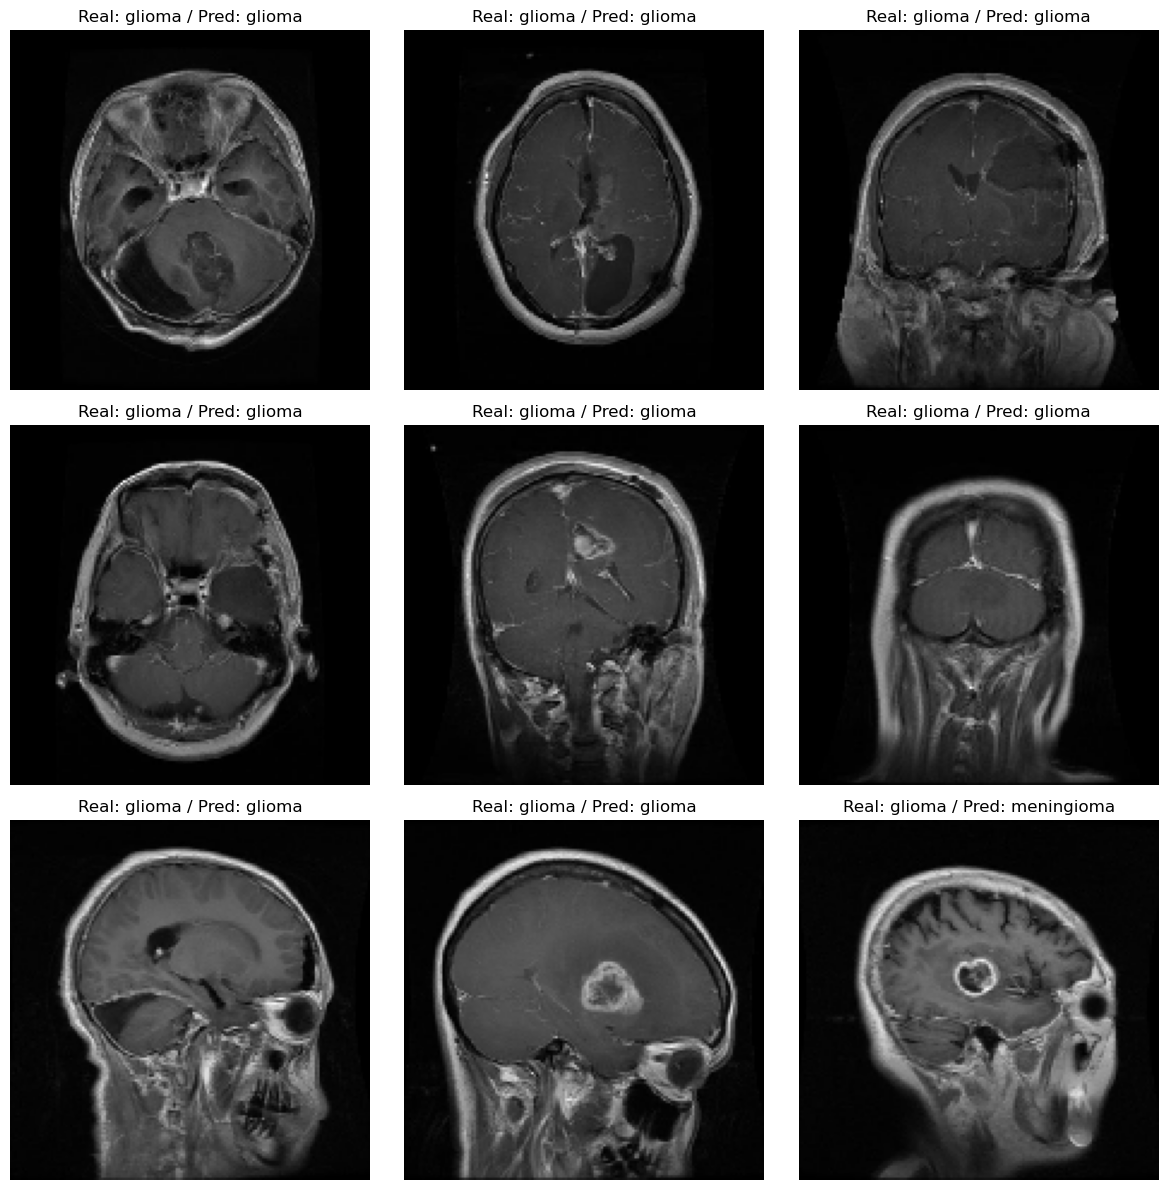

In [16]:
# Visualización de predicciones
class_names = list(test_gen.class_indices.keys())

plt.figure(figsize=(12, 12))
for i in range(9):
    img, label = test_gen[i]
    pred = model.predict(img)
    pred_label = np.argmax(pred[0])
    true_label = np.argmax(label[0])
    
    plt.subplot(3, 3, i+1)
    plt.imshow(img[0])
    plt.title(f"Real: {class_names[true_label]} / Pred: {class_names[pred_label]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

### Análisis de resultados 
**Después de entrenar y evaluar el modelo CNN, se observaron los siguientes puntos clave:**

* **Clases con mejor desempeño:** Pituitary y notumor obtuvieron mejores métricas de precisión y recall. El modelo puedo distinguirlas mejor

* **Clases con menor desempeño:** Glioma y meningioma presentaron mayor confusión entre sí, esto puede ser por su similitud lo que complica su diferenciación con CNN simple.

**Posibles causas de errores:**

* **Desequilibrio en el número de imágenes por clase:** Si una clase tiene muchas más imágenes que otras el modelo tiende a sesgarse por esa clase.

* **Alta similitud visual entre ciertos tipos de tumores:** Entre gliomas y meningiomas.

* **Variabilidad en las imágenes:** Diferencias en brillo, contraste o ruido.

  
**Sugerencias para mejorar el rendimiento:**

* Implementar Data Augmentation para mejorar la generalización del modelo.

* Usar modelos preentrenados con Transfer Learning.

* Ajustar hiperparámetros como la cantidad de filtros, tamaño de las capas, tasa de dropout.

* Aumentar la cantidad de datos disponibles por clase o balancear el dataset.

### Interpretabilidad del Modelo

**Métricas interpretables por clase**

* **Accuracy general del modelo:** 0.93, indica un excelente rendimiento global en el conjunto de prueba.

**Precision, Recall y F1-score por clase:** 

* **Glioma:** F1 = 0.92

* **Meningioma:** F1 = 0.85

* **No Tumor:** F1 = 0.96

* **Pituitary:** F1 = 0.98

El modelo es muy efectivo en distinguir tumores pituitarios (F1 = 0.98) y cerebros sin tumor (F1 = 0.96), pero presenta más dificultad con meningiomas (F1 = 0.85), probablemente por su similitud con otros tumores.

**Matriz de confusión:**
Se observa que las confusiones más comunes ocurren entre gliomas y meningiomas, algo esperable debido a su apariencia visual similar en imágenes por resonancia magnética.